In [2]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [3]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

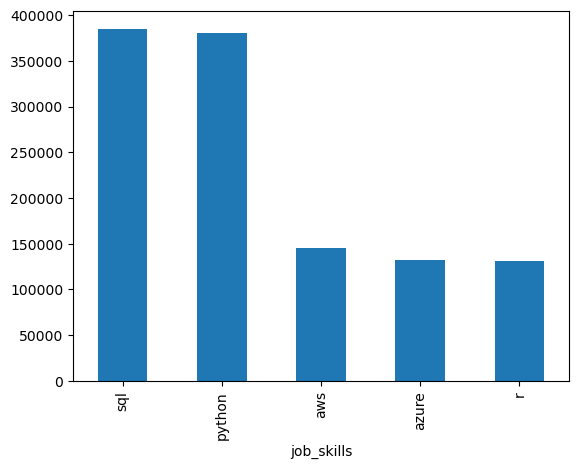

In [9]:
df_exploded[ 'job_skills'].value_counts().head(5).plot(kind = 'bar')

In [10]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

In [12]:
type(skills_count)

pandas.core.series.Series

In [13]:
df_skill_count = skills_count.reset_index(name='skills_count')
df_skill_count

,job_skills,job_title_short,skills_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [14]:
df_skill_count.sort_values(by='skills_count', ascending=False ).head(18)

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
558,excel,Data Analyst,66860
141,aws,Data Engineer,62049
151,azure,Data Engineer,60674
1518,r,Data Scientist,59566
1478,python,Data Analyst,57190


In [15]:
col = df_skill_count.pop('job_title_short')
df_skill_count.insert(0, 'job_title_short', col)
df_skill_count.head(10)

,job_title_short,job_skills,skills_count
0,Business Analyst,airflow,318
1,Cloud Engineer,airflow,260
2,Data Analyst,airflow,2002
3,Data Engineer,airflow,25505
4,Data Scientist,airflow,3915
5,Machine Learning Engineer,airflow,1164
6,Senior Data Analyst,airflow,596
7,Senior Data Engineer,airflow,8694
8,Senior Data Scientist,airflow,1403
9,Software Engineer,airflow,1397


In [16]:
df_skill_count.sort_values(by='skills_count', ascending=False, inplace=True)
df_skill_count.head(10)

,job_title_short,job_skills,skills_count
1480,Data Scientist,python,113711
1822,Data Engineer,sql,113130
1479,Data Engineer,python,108022
1821,Data Analyst,sql,92428
1823,Data Scientist,sql,78982
558,Data Analyst,excel,66860
141,Data Engineer,aws,62049
151,Data Engineer,azure,60674
1518,Data Scientist,r,59566
1478,Data Analyst,python,57190


<Axes: ylabel='job_skills'>

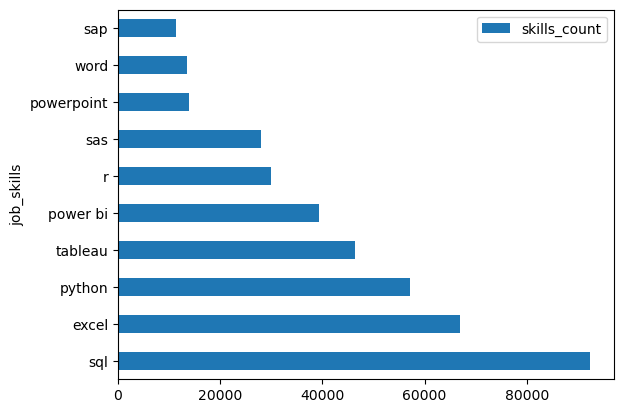

In [17]:
job_title = 'Data Analyst'
top_count = 10
df_plot_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_count)
df_plot_final.plot(kind='barh', x='job_skills',y='skills_count')